In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/macbookair/Desktop/Machine Learning/Feature_Scaling/Normalization/wine_data.csv" , header =None , usecols = [0,1,2])

In [4]:
df.columns = ['Class Label', 'Alcohol', 'Malic Acid']

In [5]:
df

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

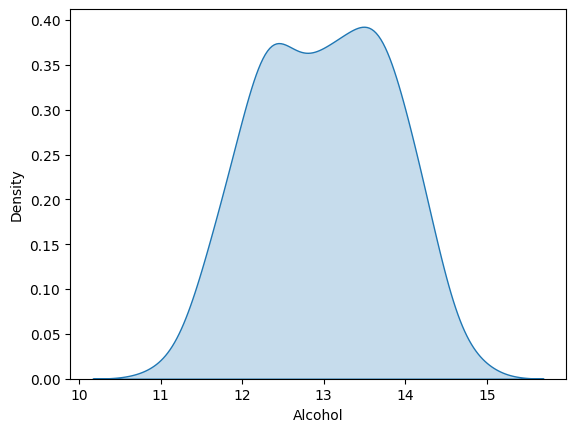

In [30]:
sns.kdeplot(df['Alcohol'], fill =True)

<Axes: xlabel='Malic Acid', ylabel='Density'>

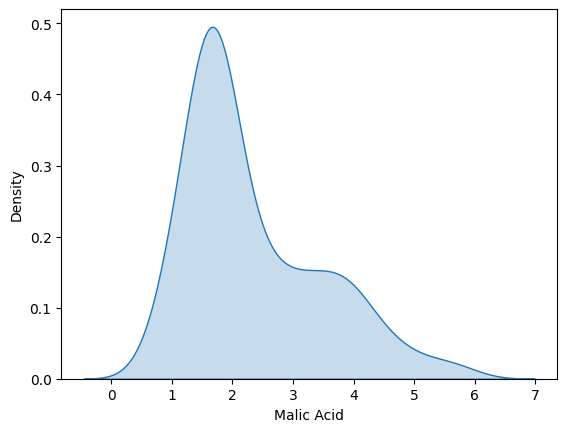

In [29]:
sns.kdeplot(df['Malic Acid'], fill=True)

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

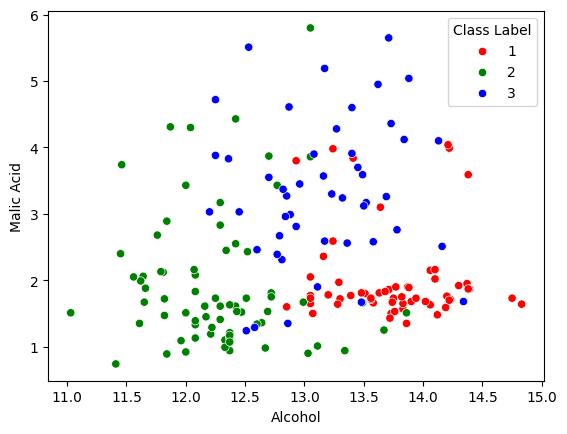

In [8]:
color_dict = {1: 'red', 2: 'green', 3: 'blue'}
sns.scatterplot(x='Alcohol', y='Malic Acid', hue='Class Label', data=df, palette=color_dict)

# train test split


In [9]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class Label',axis = 1),df['Class Label'],test_size = 0.3, random_state=0) 

In [13]:
X_train.shape , X_test.shape

((124, 2), (54, 2))

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns =X_test.columns )

In [17]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [18]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


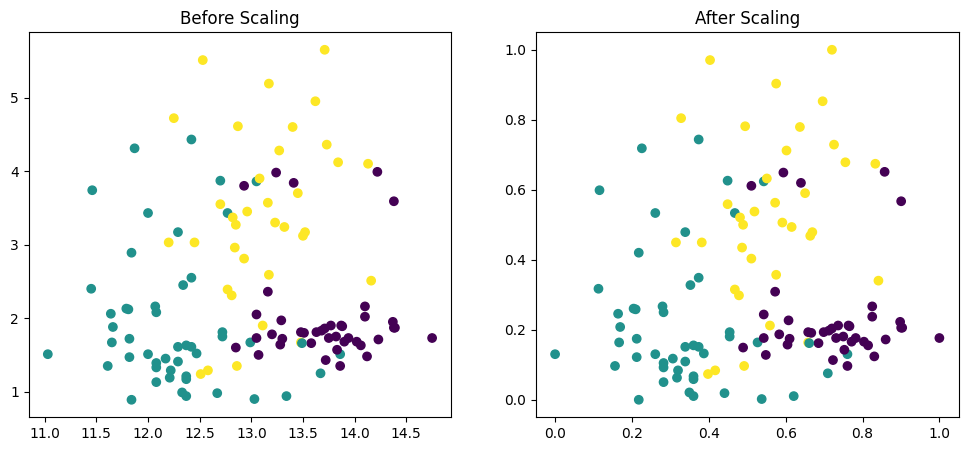

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()


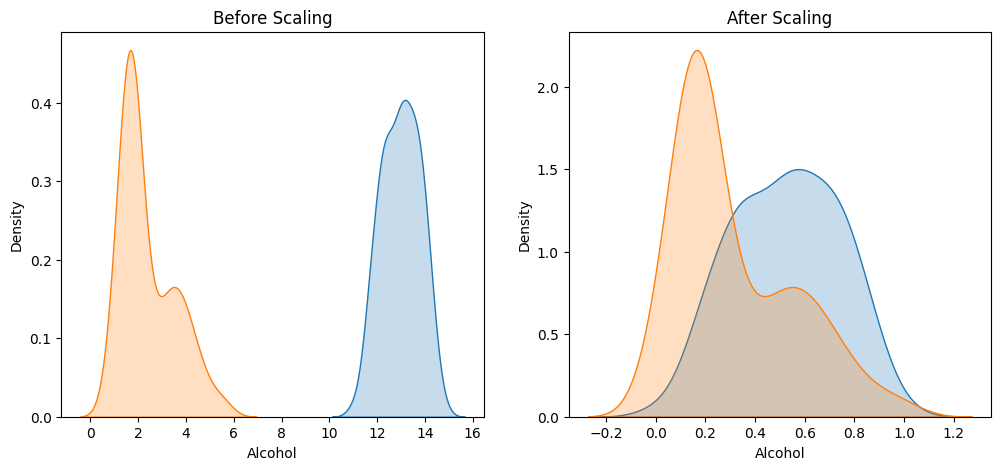

In [28]:
fig, (ax1,ax2) = plt.subplots(ncols = 2 , figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'], fill =True ,ax=ax1)
sns.kdeplot(X_train['Malic Acid'], fill =True ,ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], fill =True ,ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], fill =True ,ax=ax2)
plt.show()
